In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from loaders import load_features
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})

In [19]:
features = load_features()
features_ = features.drop(columns=['video_id']) #.dropna()
features_

,category_id,publish_weekday,publish_hour,like_ratio,likes_per_view,dislikes_per_view,comments_per_view,title_num_chars,title_num_words,title_num_uppercase_words,...,faces_angry,faces_disgust,faces_fear,faces_happy,faces_neutral,faces_sad,faces_surprise,text_area,text_centroid_x,text_centroid_y
0,NaN,4,7,0.844573,0.007707,0.001418,0.001312,45,7,0,...,0,0,0,0,0,0,0,0.000000,NaN,NaN
1,NaN,6,6,0.917645,0.024260,0.002177,0.002617,43,15,1,...,0,0,0,0,0,0,0,0.000000,NaN,NaN
2,NaN,4,17,0.947740,0.045891,0.002531,0.007336,43,13,0,...,0,0,0,0,0,0,0,0.419853,25.809107,55.878284
3,NaN,0,2,0.941463,0.006934,0.000431,0.001329,76,15,0,...,0,0,0,0,0,0,0,0.000000,NaN,NaN
4,NaN,0,1,0.937500,0.003057,0.000204,0.003057,55,9,0,...,0,0,0,0,0,0,0,0.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8602,NaN,2,18,0.753010,0.025024,0.008208,0.005323,40,8,0,...,0,0,0,0,0,0,1,0.000000,NaN,NaN
8603,NaN,1,18,0.966927,0.043077,0.001473,0.005790,29,7,4,...,0,0,0,0,0,0,1,0.000000,NaN,NaN
8604,NaN,2,15,0.960105,0.009474,0.000394,0.003082,94,17,1,...,0,0,1,0,0,0,0,0.000000,NaN,NaN
8605,NaN,1,16,0.953487,0.026300,0.001283,0.002242,66,15,0,...,0,0,0,0,0,0,0,0.046569,58.500000,26.500000


In [20]:
dropped_columns = set()
selected_attributes = list()

In [21]:
# simple variance check
from sklearn.feature_selection import VarianceThreshold

var_threshold = VarianceThreshold()
var_threshold.fit(features_)
zero_variance_columns = set(features_.columns[~var_threshold.get_support()])
features_ = features_.drop(columns=zero_variance_columns)
dropped_columns |= zero_variance_columns
zero_variance_columns

{'description__courtesi', 'faces_disgust', 'faces_neutral', 'faces_sad'}

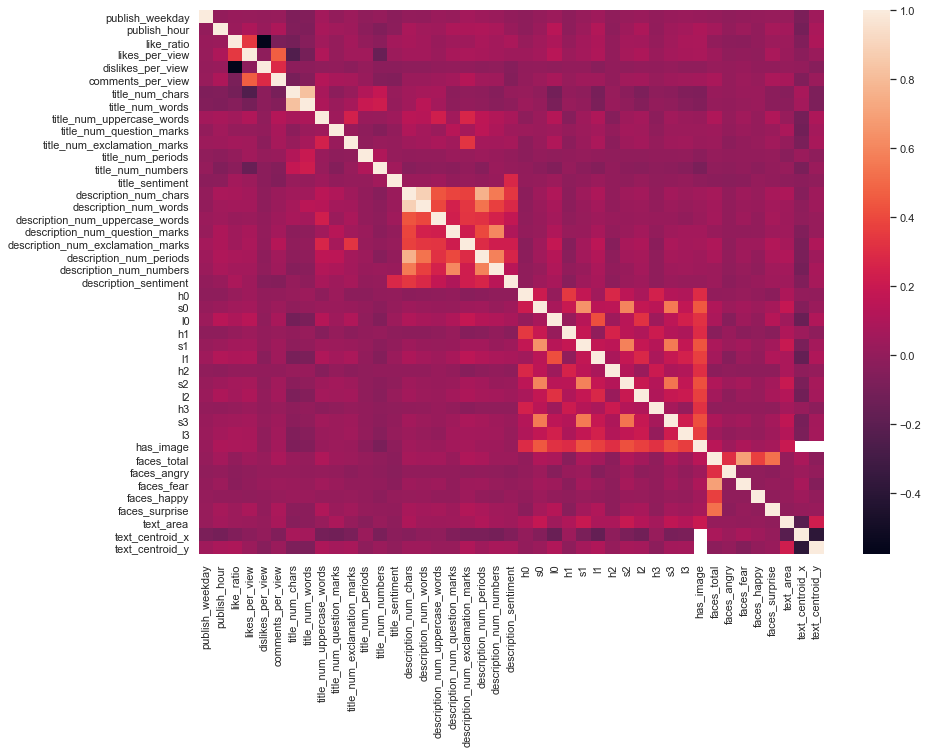

In [22]:
words = [col for col in features_.columns if col.startswith('title__') or col.startswith('description__') or col.startswith('tag__')]
without_words = features_.drop(columns=words)
plt.figure(figsize=(14, 10))
sns.heatmap(without_words.corr())

In [23]:
obviously_related_pairs = [
    ('likes_per_view', 'dislikes_per_view'),
    ('title_num_chars', 'title_num_words'),
    ('description_num_chars', 'description_num_words'),
]

for kept, dropped in obviously_related_pairs:
    dropped_columns.add(dropped)
    features_ = features_.drop(columns=[dropped])

In [24]:
from sklearn.feature_selection import SelectPercentile, chi2

features_noempty = features_.dropna()
features_tested = features_noempty.drop(columns=['category_id', 'title_sentiment', 'description_sentiment'])
chi2_selector = SelectPercentile(chi2, percentile=80)
chi2_selector.fit(features_tested, features_noempty['category_id'])
print(features_tested.columns[chi2_selector.get_support()])
print(chi2_selector.scores_[chi2_selector.get_support()])

Index(['publish_weekday', 'publish_hour', 'title_num_chars',
       'title_num_uppercase_words', 'title_num_question_marks',
       'title_num_exclamation_marks', 'title_num_periods', 'title_num_numbers',
       'title__game', 'title__vlogma',
       ...
       'h3', 's3', 'l3', 'faces_total', 'faces_angry', 'faces_fear',
       'faces_happy', 'faces_surprise', 'text_centroid_x', 'text_centroid_y'],
      dtype='object', length=130)
[1.75537430e+01 6.54110380e+01 2.26189087e+02 1.24824535e+02
 2.56527491e+01 5.08540149e+01 4.85739561e+01 4.56123762e+01
 3.96086957e+01 1.80000000e+01 2.15000000e+01 2.01370656e+01
 6.71086957e+01 1.08386328e+01 1.85436357e+01 1.91764706e+01
 2.15000000e+01 5.80000000e+01 2.15000000e+01 3.04003435e+01
 3.40000000e+01 8.44638660e+00 8.73031727e+00 1.69130435e+01
 9.58823529e+00 2.04782609e+01 8.42259107e+00 2.45146592e+01
 1.91764706e+01 2.19294947e+01 2.15000000e+01 4.30000000e+01
 1.34926190e+01 1.00434783e+01 1.48315217e+01 1.32995576e+01
 1.24565217e+0

['description_num_chars', 'description_num_periods', 'description_sentiment', 'description_num_words', 'description_num_numbers', 'description__tag', 'description__time', 'tag__science', 'description__show', 'title_num_uppercase_words', 'tag__tutorial', 'l1', 'tag__how to', 'description_num_question_marks', 'description__ant', 'description__watch', 'tag__technology', 'publish_hour', 'tag__beauty', 'tag__education', 'tag__educational', 'tag__tech', 'title__tech', 'title__iphon', 's2', 'description__life', 'description__youtub', 'description__noggin', 'tag__life noggin channel']


<BarContainer object of 29 artists>

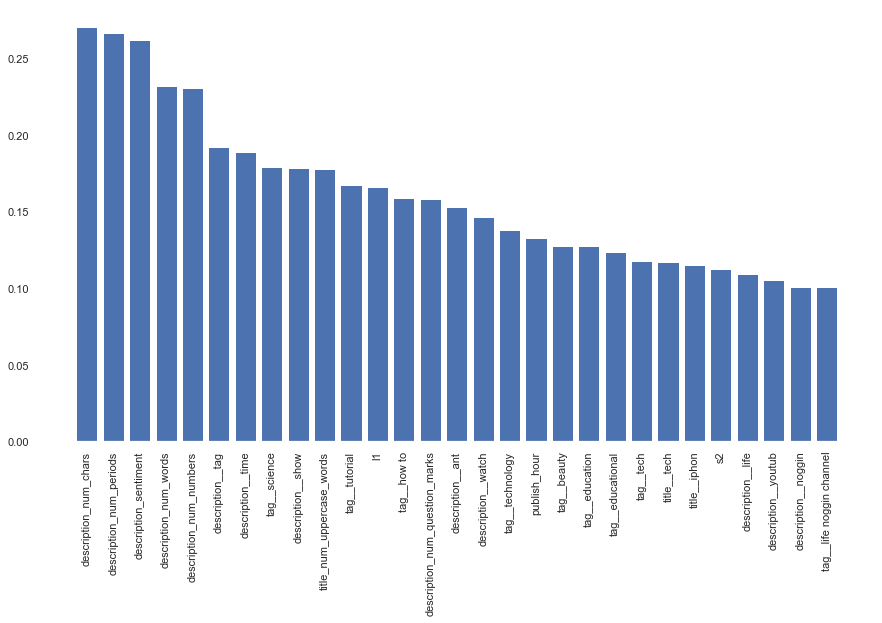

In [25]:
import math

features_ = features.drop(columns=['video_id']).dropna()
correlations = []
for col_name in features_.columns:
    col = features_[col_name]
    if any(col_name.startswith(prefix) for prefix in ['title__', 'description__', 'tag__']):
        col = col.astype(np.float32)
    corr = features_['category_id'].corr(col)
    if not math.isnan(corr):
        correlations.append((col_name, corr))

correlated_features = sorted([row for row in correlations if 1 > row[1] > 0.1], key=lambda row: -abs(row[1]))

names = [row[0] for row in correlated_features]
values = [row[1] for row in correlated_features]

print(names)
selected_attributes.extend(names)

plt.figure(figsize=(15, 8))
plt.xticks(rotation=90)
plt.bar(names, values)

In [26]:
len(features_.columns)

173

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

# using logistic regression with penalty l2.
selection = SelectFromModel(LogisticRegression(C=1, penalty='l2', solver='liblinear'))
selection.fit(features_tested, features_noempty['category_id'])

selected_features = features_tested.columns[(selection.get_support())]
print(features_tested.columns[(selection.get_support())])
print(len(selected_features))

selected_attributes.extend(selected_features.values)

Index(['publish_weekday', 'like_ratio', 'title_num_uppercase_words',
       'title_num_question_marks', 'title_num_exclamation_marks',
       'title_num_periods', 'title_num_numbers', 'title__new', 'title__2017',
       'title__1', 'title__trailer', 'title__world', 'title__offici',
       'title__video', 'title__shoot', 'title__first', 'title__day',
       'title__de', 'title__christma', 'title__made', 'title__2018',
       'title__play', 'title__hd', 'description_num_question_marks',
       'description_num_exclamation_marks', 'description__news',
       'description__game', 'description__nhttp', 'description__time',
       'description__tag', 'description__new', 'description__youtub',
       'description__music', 'description__ant', 'description__world',
       'description__show', 'description__avail', 'description__life',
       'description__imag', 'description__follow', 'description__key',
       'description__watch', 'description__deal', 'tag__funny',
       'tag__highlights', '

In [28]:
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel

# using logistic regression with penalty lasso.
selection = SelectFromModel(LassoCV())
selection.fit(features_tested, features_noempty['category_id'])

selected_features = features_tested.columns[(selection.get_support())]
print(features_tested.columns[(selection.get_support())])
print(len(selected_features))

selected_attributes.extend(selected_features.values)

Index(['description_num_chars'], dtype='object')
1


In [29]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=340)
model.fit(features_tested, features_noempty['category_id'])

importances = model.feature_importances_

final_df = pd.DataFrame({"Features": features_tested.columns, "Importances":importances})
final_df.set_index('Importances')

final_df = final_df.sort_values('Importances', ascending=False)

                            Features  Importances
3                     likes_per_view     0.036626
60             description_num_chars     0.032919
162                  text_centroid_y     0.031496
161                  text_centroid_x     0.030435
64           description_num_periods     0.029679
2                         like_ratio     0.029407
151                               h3     0.028767
4                  comments_per_view     0.027706
65           description_num_numbers     0.027482
5                    title_num_chars     0.027270
144                               l0     0.026478
153                               l3     0.026108
160                        text_area     0.025941
150                               l2     0.024759
142                               h0     0.024411
145                               h1     0.024150
148                               h2     0.024104
152                               s3     0.024079
143                               s0     0.023523


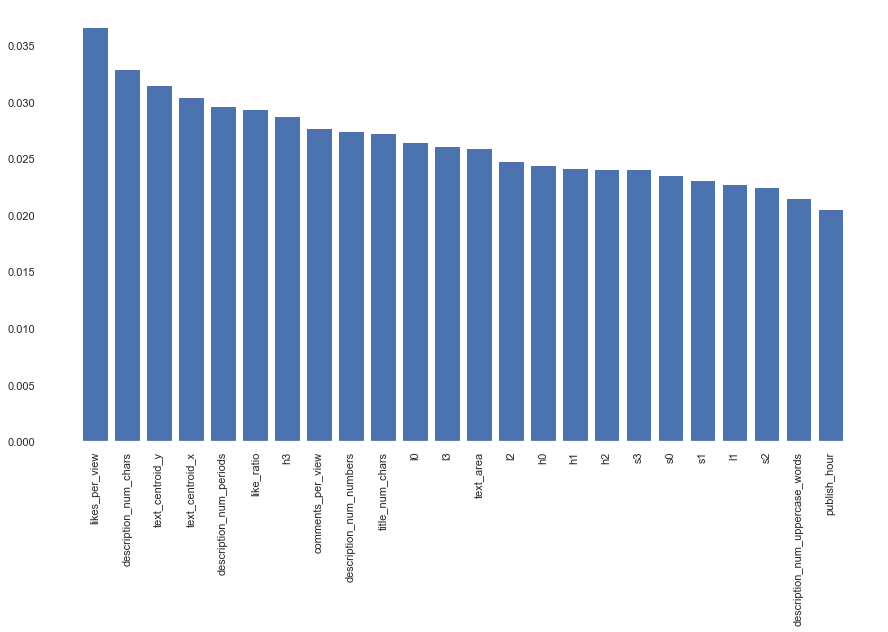

In [30]:
top_df = final_df[final_df["Importances"] > 0.02]
print(top_df)
print(len(top_df))

plt.figure(figsize=(15, 8))
plt.xticks(rotation=90)
plt.bar(top_df['Features'], top_df['Importances'])

selected_attributes.extend(top_df[['Features']])

# Selected attributes

In [31]:
attr = pd.Series(selected_attributes)
print("All selected: " + str(attr.drop_duplicates().size))

All selected: 84


In [32]:
set(attr.values)

{'Features',
 'description__ant',
 'description__avail',
 'description__deal',
 'description__follow',
 'description__game',
 'description__imag',
 'description__key',
 'description__life',
 'description__music',
 'description__new',
 'description__news',
 'description__nhttp',
 'description__noggin',
 'description__show',
 'description__tag',
 'description__time',
 'description__watch',
 'description__world',
 'description__youtub',
 'description_num_chars',
 'description_num_exclamation_marks',
 'description_num_numbers',
 'description_num_periods',
 'description_num_question_marks',
 'description_num_words',
 'description_sentiment',
 'faces_fear',
 'faces_happy',
 'faces_surprise',
 'faces_total',
 'has_image',
 'l1',
 'like_ratio',
 'publish_hour',
 'publish_weekday',
 's2',
 'tag__animation',
 'tag__basketball',
 'tag__beauty',
 'tag__comedy',
 'tag__education',
 'tag__educational',
 'tag__fashion',
 'tag__food',
 'tag__funny',
 'tag__highlights',
 'tag__how to',
 'tag__humor',
 

In [33]:
list(attr[attr.duplicated()])

['title_num_uppercase_words',
 'description_num_question_marks',
 'description__time',
 'description__tag',
 'description__youtub',
 'description__ant',
 'description__show',
 'description__life',
 'description__watch',
 'tag__beauty',
 'tag__science',
 'tag__how to',
 'tag__tutorial',
 'description_num_chars']